In [66]:
# import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [67]:
# bringing in the dataset
food_data_path = "Resources/FoodDesert2015.csv"
missouri_data_path = "Resources/MissouriFoodDesert2015.csv"
groc_rest_data_path = "Resources/FoodEnvironmentData.csv"

food_df = pd.read_csv(food_data_path)
missouri_df = pd.read_csv(missouri_data_path)
groc_rest_df = pd.read_csv(groc_rest_data_path)

In [68]:
#preview dataframe for reference
food_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,0,3326,1317,0,57,0.017138,0,...,593,3106,6,15,0,27,172,309,56,116
72860,56043000301,Wyoming,Washakie,1,2665,1154,0,10,0.003752,0,...,399,2377,5,23,0,40,220,446,114,124
72861,56043000302,Wyoming,Washakie,1,2542,1021,0,73,0.028717,0,...,516,2312,11,10,1,26,182,407,82,97
72862,56045951100,Wyoming,Weston,0,3314,1322,0,252,0.076041,0,...,499,3179,15,10,1,47,62,91,108,50


In [69]:
#preview dataframe for reference
missouri_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,29001950100,Missouri,Adair,0,3802,1456,0,0,0.000000,0,...,553,3720,7,21,0,17,37,22,43,88
1,29001950200,Missouri,Adair,0,3019,1223,0,0,0.000000,0,...,510,2964,5,8,0,12,30,22,35,145
2,29001950300,Missouri,Adair,1,2951,1388,0,52,0.017621,0,...,269,2721,49,73,3,10,95,77,214,241
3,29001950400,Missouri,Adair,0,3892,1727,0,41,0.010534,0,...,663,3703,36,60,4,13,76,83,103,206
4,29001950500,Missouri,Adair,1,7079,2992,0,379,0.053539,1,...,998,6581,149,134,2,20,193,172,337,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,29510127200,Missouri,St. Louis City,1,4075,2100,0,199,0.048834,0,...,515,3100,651,195,0,12,117,124,209,146
1389,29510127300,Missouri,St. Louis City,1,3769,1643,0,131,0.034757,0,...,352,1040,2523,86,0,10,110,54,239,375
1390,29510127400,Missouri,St. Louis City,1,4795,2046,0,0,0.000000,0,...,346,1206,3438,48,1,8,94,62,694,981
1391,29510127500,Missouri,St. Louis City,1,2237,1264,0,12,0.005364,0,...,180,521,1649,21,1,1,44,30,365,327


In [70]:
groc_rest_df

,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants
0,AL,Autauga,6,1,29,2,30,34
1,AL,Baldwin,24,6,119,21,112,202
2,AL,Barbour,5,0,14,2,21,12
3,AL,Bibb,6,1,19,0,7,6
4,AL,Blount,6,1,31,2,24,19
...,...,...,...,...,...,...,...,...
3138,WY,Sweetwater,5,1,28,2,27,31
3139,WY,Teton,6,0,12,4,25,55
3140,WY,Uinta,3,1,15,3,15,23
3141,WY,Washakie,3,0,5,0,8,14


In [71]:
#create dataframe with columns that will be used for scatter plots
scatter_df = missouri_df[['CensusTract',
                          'County',
                          'lapop1',
                          'PovertyRate'
                 ]]
#rename columns for clarity
scatter_df = scatter_df.rename(columns={"lapop1": "TotalPop1MileFromSupermarket",})
scatter_df.head(20)

,CensusTract,County,TotalPop1MileFromSupermarket,PovertyRate
0,29001950100,Adair,3679.872817,14.8
1,29001950200,Adair,3018.929115,15.9
2,29001950300,Adair,186.836071,44.0
3,29001950400,Adair,472.727219,11.5
4,29001950500,Adair,5399.865322,27.5
5,29001950900,Adair,0.000000,53.9
6,29001951000,Adair,167.606583,61.1
7,29003010100,Andrew,4290.003170,7.7
8,29003010200,Andrew,1588.042322,9.7
9,29003010300,Andrew,2062.999995,11.9


In [72]:
#find the mean, and median of the poverty rate
poverty_mean = scatter_df.groupby("County").mean()["PovertyRate"]
poverty_median = scatter_df.groupby("County").median()["PovertyRate"]

#find the total population that lives 1 mile or more from a supermarket by summing relevant column
total_pop_sum = scatter_df.groupby("County").sum()["TotalPop1MileFromSupermarket"]

#create new dataframe that stores variable values
poverty_info = pd.DataFrame({"Poverty Rate Mean":poverty_mean,
                                  "Poverty Rate Median":poverty_median,
                                  "Low Access": total_pop_sum
                            })
#preview dataframe for reference
poverty_info

,Poverty Rate Mean,Poverty Rate Median,Low Access
County,,,
Adair,32.671429,27.50,12925.837127
Andrew,9.925000,10.05,10992.045476
Atchison,11.200000,11.20,4105.650403
Audrain,17.442857,20.20,14060.101377
Barry,20.057143,18.40,27000.071487
...,...,...,...
Washington,22.880000,22.20,21642.405984
Wayne,21.825000,21.80,11840.652124
Webster,17.275000,18.05,27321.979177


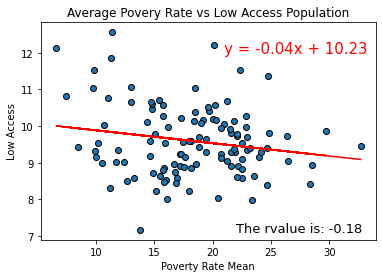

In [73]:
#set x and y values
x_values=poverty_info["Poverty Rate Mean"]
#because the data numbers are large values for y_values, use log base 10 to shrink values that are more comparable to x_values
y_values=np.log(poverty_info["Low Access"])
#create linear regression values and plot the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker ="o", edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,12),fontsize=15,color="red")
#see if the r value shows any correlation in the data plotted.
plt.annotate(f'The rvalue is: {round(rvalue,2)}',(22,7.1),fontsize=13,color="black")
plt.title("Average Povery Rate vs Low Access Population")
plt.xlabel("Poverty Rate Mean")
plt.ylabel("Low Access")


#save and display figure
plt.savefig("output_data/PovertyRateMean.png")

plt.show()

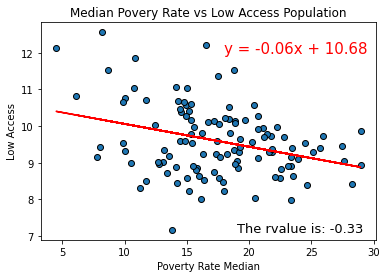

In [74]:
#repeat for poverty rate median, and low access
x_1_values = poverty_info["Poverty Rate Median"]
y_1_values = np.log(poverty_info["Low Access"])
(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_1_values, y_1_values)
regress_values_1 = x_1_values * slope_1 + intercept_1
line_eq_1 = "y = " + str(round(slope_1,2)) + "x + " + str(round(intercept_1,2))
plt.scatter(x_1_values,y_1_values, marker ="o", edgecolor='black')
plt.title("Median Povery Rate vs Low Access Population")
plt.plot(x_1_values,regress_values_1,"r-")
plt.annotate(line_eq_1,(18,12),fontsize=15,color="red")
plt.annotate(f'The rvalue is: {round(rvalue_1,2)}',(19,7.1),fontsize=13,color="black")
plt.xlabel("Poverty Rate Median")
plt.ylabel("Low Access")
plt.savefig("output_data/PovertyRateMedian.png")

plt.show()

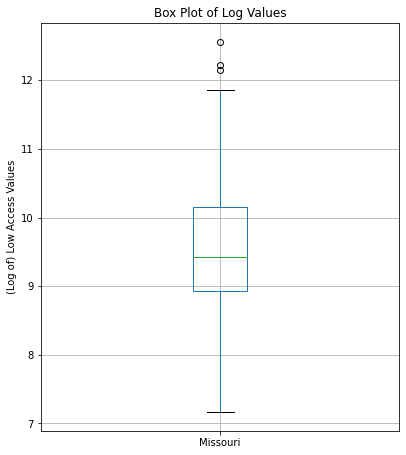

In [75]:
#create a boxplot to see the distribution of data and visualize any outliers. log is used to shrink data values
poverty_info['Log Values'] = np.log(poverty_info['Low Access'])
#create list for x_ticks
state_lst=["Missouri"]
#create,show, and save boxplot
b_plot=poverty_info.boxplot("Log Values", figsize=(6.42,7.5))
plt.title("Box Plot of Log Values")
plt.ylabel("(Log of) Low Access Values")
b_plot.set_xticklabels(state_lst)
plt.savefig("output_data/LowAccessPopBoxPlot.png")
plt.show()

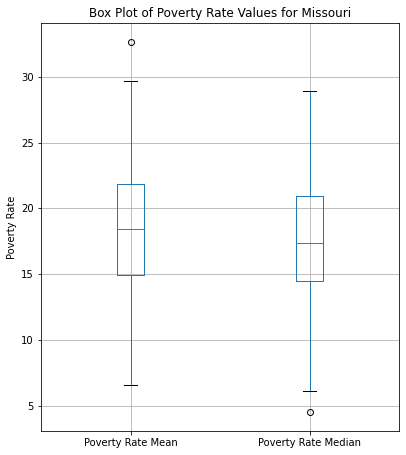

In [76]:
#Repeat process for Poverty Rate Boxplots
plot_lst=["Poverty Rate Mean","Poverty Rate Median"]
b_plot_rate=poverty_info.boxplot(plot_lst, figsize=(6.42,7.5))
plt.title("Box Plot of Poverty Rate Values for Missouri")
plt.ylabel("Poverty Rate")
#set x ticks to the data set that is being shown
b_plot_rate.set_xticklabels(plot_lst)
plt.savefig("output_data/LowAccessPopBoxPlotPovertyRate.png")
plt.show()

In [77]:
# filtering dataframe by Missouri & low income tracts to get food desert info
mo_food_desert_df = missouri_df[missouri_df["LowIncomeTracts"] == 1]
mo_food_desert_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
2,29001950300,Missouri,Adair,1,2951,1388,0,52,0.017621,0,...,269,2721,49,73,3,10,95,77,214,241
4,29001950500,Missouri,Adair,1,7079,2992,0,379,0.053539,1,...,998,6581,149,134,2,20,193,172,337,416
5,29001950900,Missouri,Adair,1,2277,1017,0,0,0.000000,0,...,208,2086,41,81,1,4,64,51,107,163
6,29001951000,Missouri,Adair,1,2587,74,1,2428,0.938539,0,...,9,2291,121,76,3,3,93,96,25,6
13,29007950100,Missouri,Audrain,1,4180,1185,0,1505,0.360048,1,...,596,3435,621,14,1,17,92,72,71,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,29510127000,Missouri,St. Louis City,0,2470,654,0,928,0.375709,0,...,106,349,1967,6,0,3,145,142,178,232
1387,29510127100,Missouri,St. Louis City,1,2234,927,0,74,0.033124,0,...,338,60,2131,0,0,3,40,12,426,469
1389,29510127300,Missouri,St. Louis City,1,3769,1643,0,131,0.034757,0,...,352,1040,2523,86,0,10,110,54,239,375
1390,29510127400,Missouri,St. Louis City,1,4795,2046,0,0,0.000000,0,...,346,1206,3438,48,1,8,94,62,694,981


In [78]:
# finding the total population of Missouri(with the counties that are given in the dataframe)
total_pop = missouri_df["POP2010"].sum()

# finding the count of the population that lives 1 mile or further from a supermarket
total_low_access_pop_count = round(missouri_df["lapop1"].sum(),2)

# finding sum of people living in a food desert in Missouri
total_la_fd_pop_count = round(mo_food_desert_df["lapop1"].sum(),2)

In [79]:
# OTHER RACE
# creating a list of columns to be summed for data
low_access_pops = ['lanhopi1', 'laaian1','laomultir1']
total_pops = ['TractNHOPI','TractAIAN','TractOMultir']

# gathering relevant data on other race using the following columns:
other_race_df = missouri_df[['County','lanhopi1', 'laaian1','laomultir1','TractNHOPI','TractAIAN','TractOMultir']]
fd_other_race_df = mo_food_desert_df[['County','lanhopi1', 'laaian1','laomultir1','TractNHOPI','TractAIAN','TractOMultir']]

# grouping other_race data by County
other_race_sum = other_race_df.groupby(['County'], as_index=False).sum()
fd_other_race_sum = fd_other_race_df.groupby(['County'], as_index=False).sum()

# changing groupby dataframe name for clarity
other_race_df = other_race_sum
fd_other_race_df = fd_other_race_sum

# creating a column that contains the sum of low access populations
other_race_df['Other Race Sum']= other_race_sum[low_access_pops].sum(axis=1)
fd_other_race_df['Sum of Low Access']= fd_other_race_sum[low_access_pops].sum(axis=1)

# repeating for total populations by race
other_race_df['Other Total Pop Race Sum']= other_race_sum[total_pops].sum(axis=1)

# calculations for sums
total_other_pop = other_race_df['Other Total Pop Race Sum'].sum()
other_mile_count = round(other_race_df["Other Race Sum"].sum(),2)
other_fd_mile_count = round(fd_other_race_df["Sum of Low Access"].sum(),2)

# calculations for percentages
percent_other = round((total_other_pop/total_pop)*100,2)
other_mile_percent = round((other_mile_count/total_other_pop)*100,2)
fd_other_mile_percent = round((other_fd_mile_count/total_other_pop)*100,2)

In [80]:
# WHITE
# calculations for sums
total_white_pop = missouri_df["TractWhite"].sum()
white_mile_count = round(missouri_df["lawhite1"].sum(),2)
white_fd_mile_count = round(mo_food_desert_df["lawhite1"].sum(),2)

# calculations for percentages
percent_white = round((total_white_pop/total_pop)*100,2)
white_mile_percent = round((white_mile_count/total_white_pop)*100,2)
fd_white_mile_percent = round((white_fd_mile_count/total_white_pop)*100,2)

In [81]:
# BLACK
# calculations for sums
total_black_pop = missouri_df["TractBlack"].sum()
black_mile_count = round(missouri_df["lablack1"].sum(),2)
black_fd_mile_count = round(mo_food_desert_df["lablack1"].sum(),2)

# calculations for percentages
percent_black = round((total_black_pop/total_pop) * 100, 2)
black_mile_percent = round((black_mile_count/total_black_pop) * 100, 2)
fd_black_mile_percent = round((black_fd_mile_count/total_black_pop) * 100 ,2)

In [82]:
# HISPANIC
# calculations for sums
total_hisp_pop = missouri_df["TractHispanic"].sum()
hisp_mile_count = round(missouri_df["lahisp1"].sum(),2)
hisp_fd_mile_count = round(mo_food_desert_df["lahisp1"].sum(),2)

# calculations for percentages
percent_hisp = round((total_hisp_pop/total_pop)*100,2)
hisp_mile_percent = round((hisp_mile_count/total_hisp_pop)*100,2)
fd_hisp_mile_percent = round((hisp_fd_mile_count/total_hisp_pop)*100,2)

In [83]:
# ASIAN
# calculations for sums
total_asian_pop = missouri_df["TractAsian"].sum()
asian_mile_count = round(missouri_df["laasian1"].sum(),2)
asian_fd_mile_count = round(mo_food_desert_df["laasian1"].sum(),2)

# calculations for percentages
asian_mile_percent = round((asian_mile_count/total_asian_pop)*100,2)
percent_asian = round((total_asian_pop/total_pop)*100,2)
fd_asian_mile_percent = round((asian_fd_mile_count/total_asian_pop)*100,2)

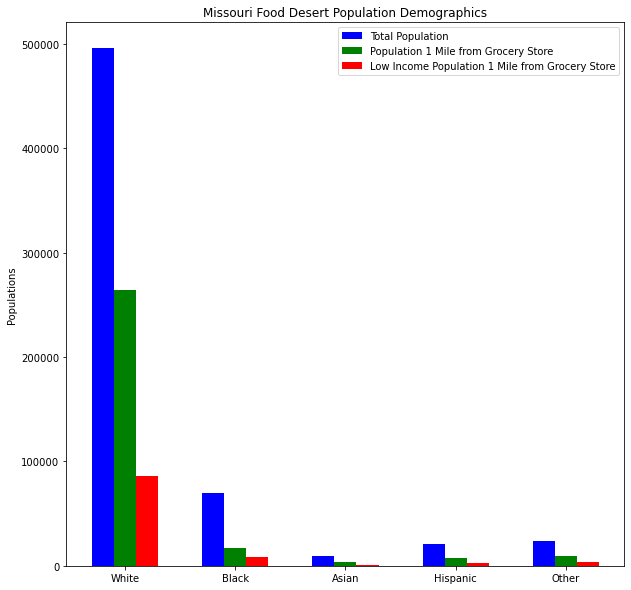

In [84]:
# creating the list of labels
x = ['White', 'Black', 'Asian', 'Hispanic', 'Other']
ind = np.arange(len(x))  # the x locations for the groups
w = 0.2       # the width of the bars
y_ticks = np.arange(0, 600000, 100000) # setting y ticks because didn't like the auto

# lists of the things we are plotting
y = [total_white_pop, total_black_pop, total_asian_pop, total_hisp_pop, total_other_pop]
z = [white_mile_count, black_mile_count, asian_mile_count, hisp_mile_count, other_mile_count]
k = [white_fd_mile_count, black_fd_mile_count, asian_fd_mile_count, hisp_fd_mile_count, other_fd_mile_count]

# creating the bar graph
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.bar(ind, y, width=0.2, color='b', align='center', label="Total Population")
ax.bar(ind+w, z, width=0.2, color='g', align='center', label="Population 1 Mile from Grocery Store")
ax.bar(ind+(w*2), k, width=0.2, color='r', align='center', label="Low Income Population 1 Mile from Grocery Store")

# cleaning up visually, setting labels and creating legend
ax.set_ylabel('Populations')
ax.set_yticklabels(y_ticks)
ax.set_xticks(ind+w)
ax.set_xticklabels(x)
plt.legend()
plt.title("Missouri Food Desert Population Demographics")

plt.savefig("output_data/PopulationDemographics.png")


plt.show()

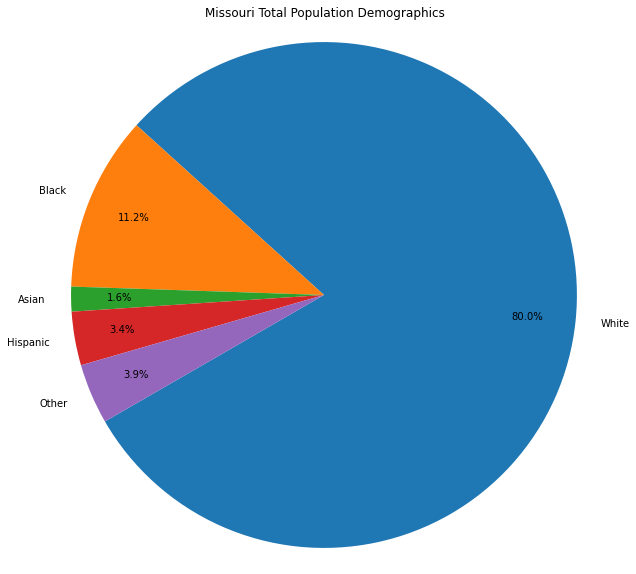

In [85]:
# creating variables for pie charts
labels = ['White', 'Black', 'Asian', 'Hispanic', 'Other']
# explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
total_pop_percents = [percent_white, percent_black, percent_asian, percent_hisp, percent_other]
la_percents = [white_mile_percent, black_mile_percent, asian_mile_percent, hisp_mile_percent, other_mile_percent]
la_li_percents = [fd_white_mile_percent, fd_black_mile_percent, fd_asian_mile_percent, fd_hisp_mile_percent, fd_other_mile_percent]

# creating the pie chart and labeling
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.pie(total_pop_percents, labels=labels,autopct='%1.1f%%', startangle=210, labeldistance=1.1,pctdistance=.81)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Missouri Total Population Demographics")
# saving output
plt.savefig("output_data/PopulationPercentageDemographics.png")

plt.show()

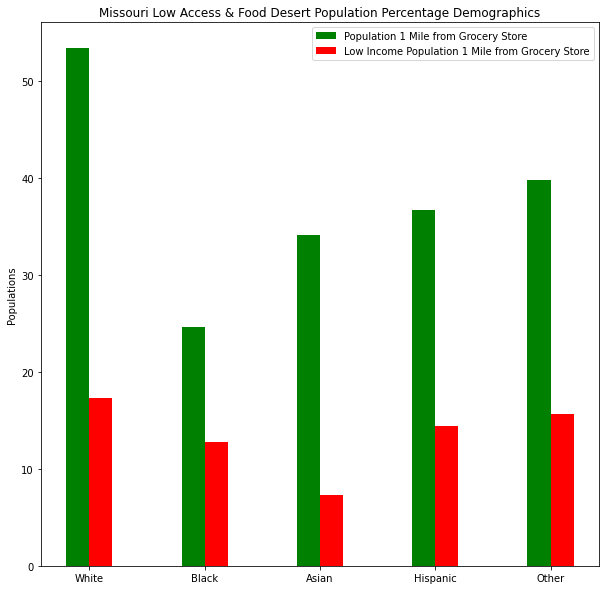

In [86]:
# creating variables for bar graph
labels = ['White', 'Black', 'Asian', 'Hispanic', 'Other'] 
la_percents = [white_mile_percent, black_mile_percent, asian_mile_percent, hisp_mile_percent, other_mile_percent]
la_li_percents = [fd_white_mile_percent, fd_black_mile_percent, fd_asian_mile_percent, fd_hisp_mile_percent, fd_other_mile_percent]
ind = np.arange(len(labels))  # the x locations for the groups
w = 0.1       # the width of the bars

# creating the bar graph
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.bar(ind-w,la_percents, color='g', width=0.2, align='center', label="Population 1 Mile from Grocery Store")
ax.bar(ind+w, la_li_percents, color='r', width=0.2, align='center', label="Low Income Population 1 Mile from Grocery Store")

# cleaning up visually, setting labels and creating legend
ax.set_ylabel('Populations')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.legend()
plt.title("Missouri Low Access & Food Desert Population Percentage Demographics")

plt.savefig("output_data/PopulationPercentagesDemographics.png")

plt.show()

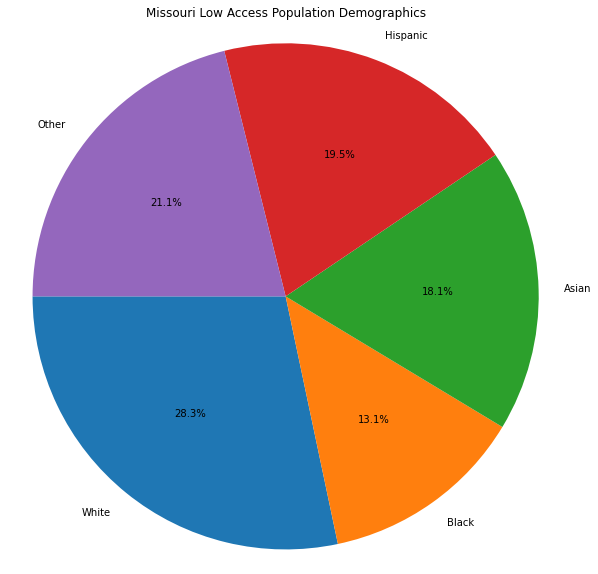

In [87]:
# creating the pie chart and labeling
fig = plt.figure(figsize=[10, 10])
ax= fig.add_subplot(111)
ax.pie(la_percents, labels=labels, autopct='%1.1f%%', startangle=180, labeldistance=1.1, pctdistance=.6)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Missouri Low Access Population Demographics")

# saving output
plt.savefig("output_data/LowAccessPercentageDemographics.png")

plt.show()

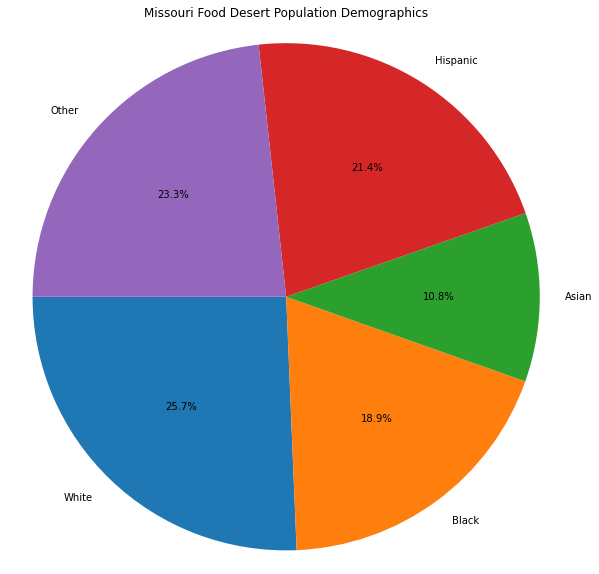

In [88]:
# creating the pie chart and labeling
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.pie(la_li_percents, labels=labels, autopct='%1.1f%%', startangle=180, labeldistance=1.1, pctdistance=.6)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Missouri Food Desert Population Demographics")

# saving output
plt.savefig("output_data/FoodDesertPercentageDemographics.png")

plt.show()

In [89]:
# getting the data for just the relevant counties
mo_df = groc_rest_df[groc_rest_df["State"] == "MO"]
counties_df = mo_df[(mo_df["County"] == "St. Louis City") \
                    | (mo_df["County"] == "St. Louis") \
                    | (mo_df["County"] == "St. Charles") \
                    | (mo_df["County"] == "Jefferson") \
                    | (mo_df["County"] == "Platte") \
                    | (mo_df["County"] == "Jackson") \
                    | (mo_df["County"] == "Clay") \
                    | (mo_df["County"] == "Cass")]
counties_df

,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants
1501,MO,Cass,13,2,42,4,51,60
1506,MO,Clay,32,4,55,11,155,142
1530,MO,Jackson,98,11,235,42,502,457
1532,MO,Jefferson,26,2,88,7,118,95
1565,MO,Platte,12,1,21,6,66,71
1574,MO,St. Charles,40,4,103,25,250,252
1578,MO,St. Louis,182,8,334,77,815,718
1597,MO,St. Louis City,115,0,125,27,296,345


In [90]:
# creating a new column summing the values for the different types of grocery stores
counties_df["TotalSupermarket"] = counties_df[["GroceryStores", "SupercentersClubStores", "SpecializedFoodStores"]].sum(axis=1)
counties_df

<ipython-input-90-be2f1578aff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_df["TotalSupermarket"] = counties_df[["GroceryStores", "SupercentersClubStores", "SpecializedFoodStores"]].sum(axis=1)


,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants,TotalSupermarket
1501,MO,Cass,13,2,42,4,51,60,19
1506,MO,Clay,32,4,55,11,155,142,47
1530,MO,Jackson,98,11,235,42,502,457,151
1532,MO,Jefferson,26,2,88,7,118,95,35
1565,MO,Platte,12,1,21,6,66,71,19
1574,MO,St. Charles,40,4,103,25,250,252,69
1578,MO,St. Louis,182,8,334,77,815,718,267
1597,MO,St. Louis City,115,0,125,27,296,345,142


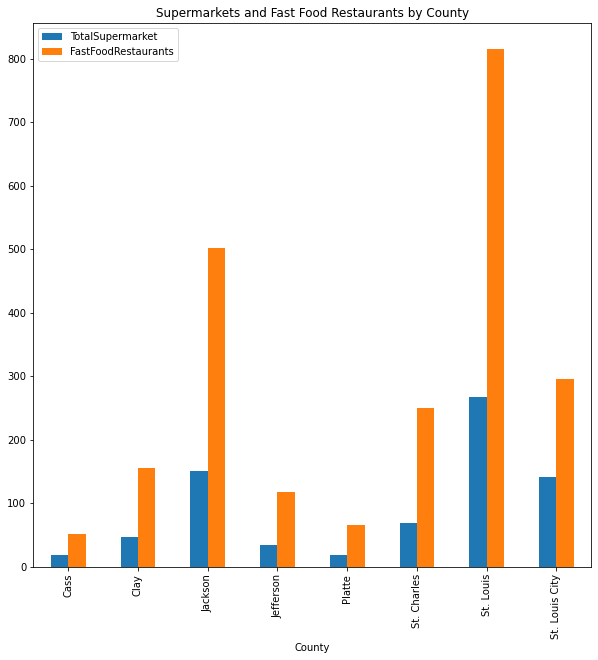

In [91]:
# plotting the bar graph
bar_df = counties_df[["County","TotalSupermarket","FastFoodRestaurants"]]
bar_df = bar_df.set_index("County")
ax = bar_df.plot(kind="bar", rot="vertical", figsize=(10,10))
plt.title("Supermarkets and Fast Food Restaurants by County")
plt.savefig("output_data/GrocFFbyCounty.png")

plt.show()

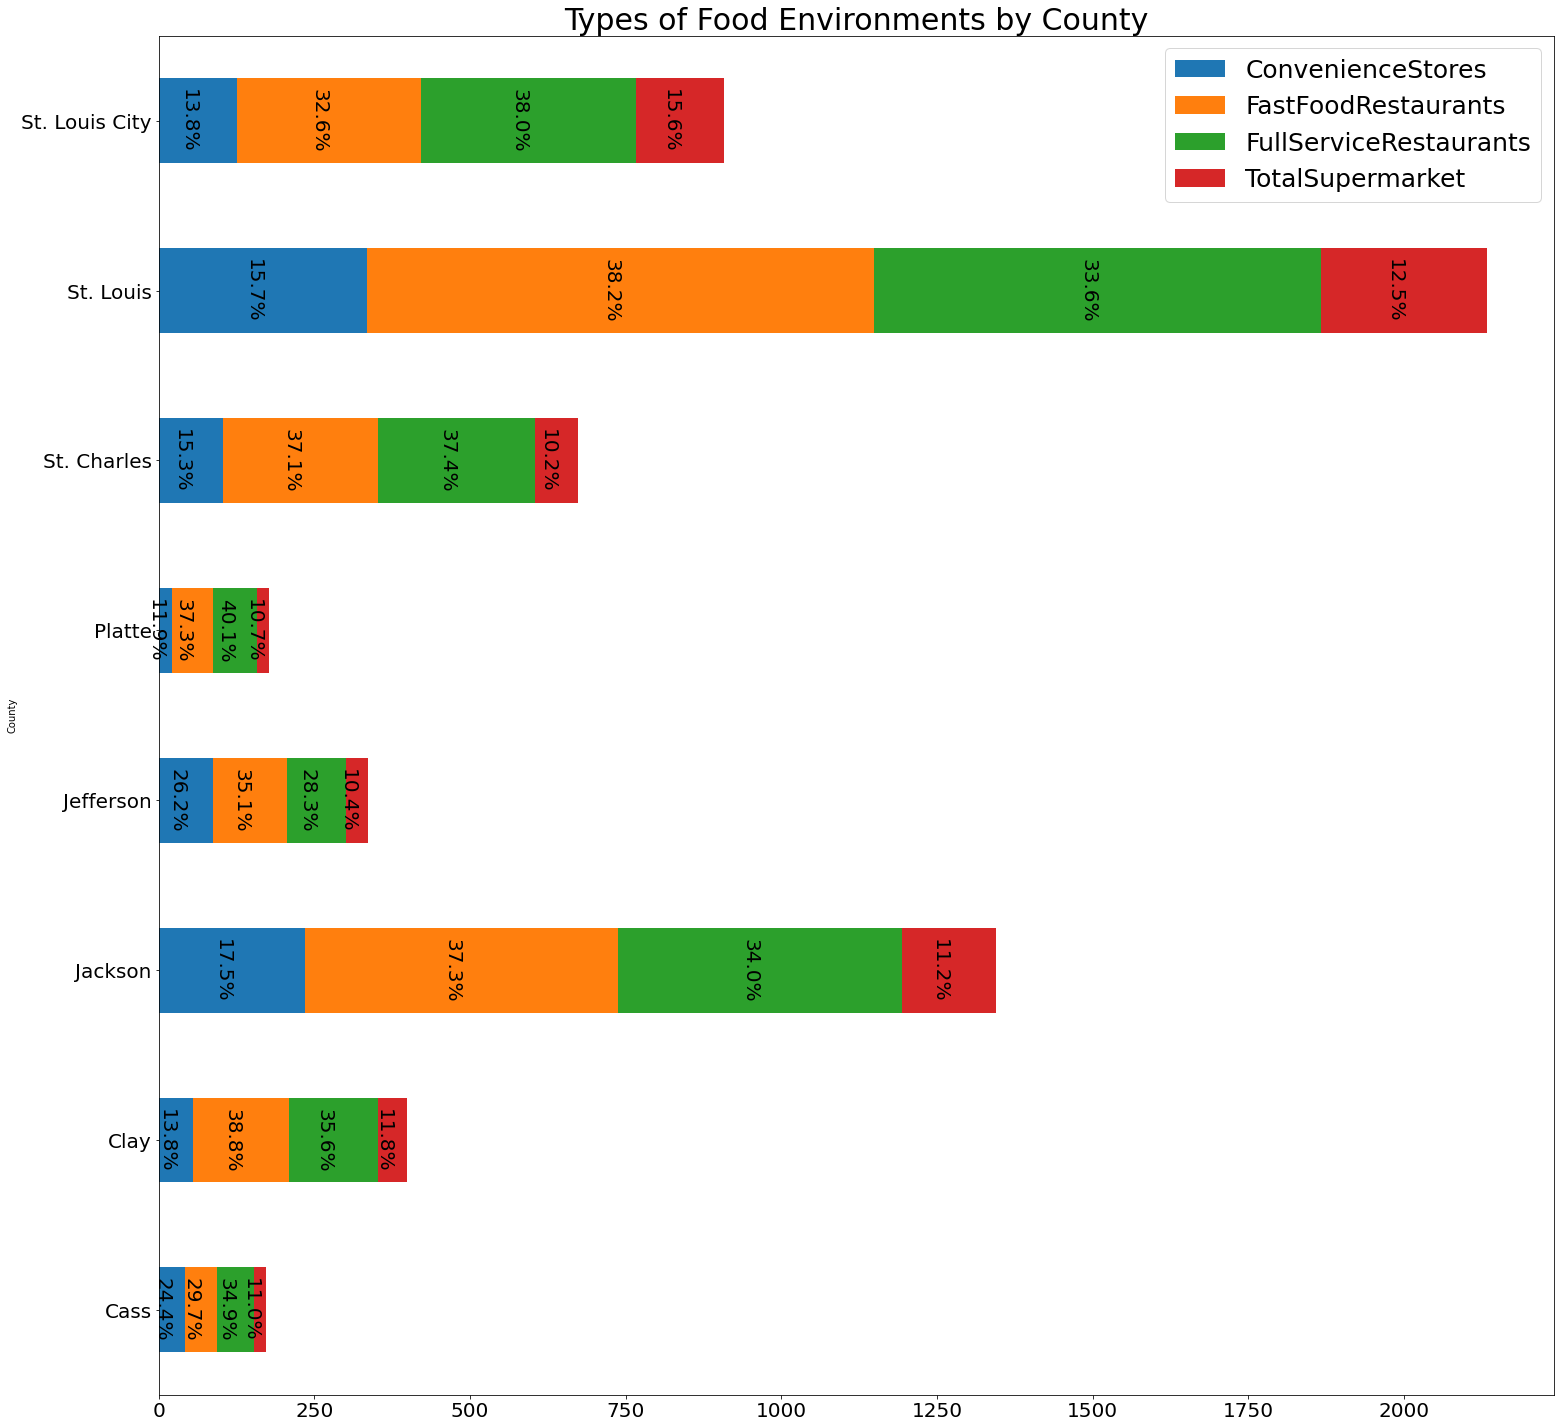

In [92]:
#set the index of counties_df to County
index_counties_df = counties_df.set_index("County")
#since TotalSupermarket is the sum of 3 columns drop the 3 columns that make up TotalSupermarket
cleaned_counties_df=index_counties_df.drop(columns=['GroceryStores','SupercentersClubStores','SpecializedFoodStores'])
#plot bar chart
ax = cleaned_counties_df.plot(kind="barh",stacked=True, rot="horizontal", figsize=(25,25))
#create variable that will sum the values of the columns used in the bar chart
counties_total = cleaned_counties_df["ConvenienceStores"] + cleaned_counties_df["FastFoodRestaurants"] + cleaned_counties_df["FullServiceRestaurants"] + cleaned_counties_df["TotalSupermarket"]
#divide counties total by the number of columns used
counties_rel = cleaned_counties_df[cleaned_counties_df.columns[1:]].div(counties_total, 0)*100
#create values for percent texts and place the text inside the bar chart
for n in counties_rel: 
    for i, (cs, ab, pc) in enumerate(zip(cleaned_counties_df.iloc[:, 1:].cumsum(1)[n],  
                                         cleaned_counties_df[n], counties_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'right',rotation=270,fontsize=20)
#resize xticks,yticks, and legend
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=25)

#title plot and display
plt.title("Types of Food Environments by County",fontsize=30)
plt.savefig("output_data/FoodEnvironmentbyCounty.png")

plt.show()